In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('./ex1/ex1data1.txt',header=None)

In [4]:
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
X = data.iloc[:,0].values
y = data.iloc[:,1].values

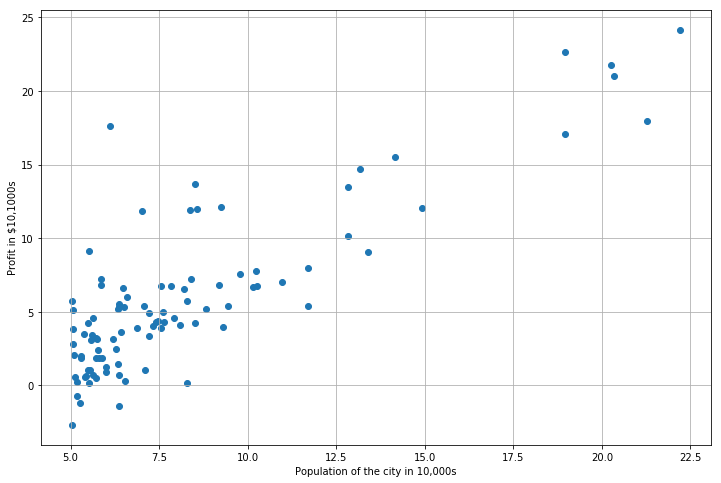

In [6]:
plt.figure(figsize=(12,8))
plt.scatter(X,y)
plt.xlabel('Population of the city in 10,000s')
plt.ylabel('Profit in $10,1000s')
plt.grid()

In [7]:
X = np.reshape(X,(-1,1))

In [8]:
ones = np.ones((X.shape[0])).reshape(-1,1)

In [9]:
X = np.hstack((ones,X))
print(X.shape)

(97, 2)


In [10]:
theta = np.zeros((2,1))
print(theta.shape)

(2, 1)


In [11]:
iterations = 1500
alpha = 0.01

In [12]:
def compute_cost(X, y, theta):
    cost = 0
    for i in range(X.shape[0]):
        cost += np.square(np.dot(theta.T,X[i]) - y[i])
    cost = cost/(2*X.shape[0])
    return cost[0]

In [13]:
compute_cost(X,y,theta)

32.072733877455654

In [14]:
def grad_descent(iterations, theta, X,y):
    costs = list()
    for j in range(iterations):
        theta[0] -= alpha*(1/X.shape[0])*np.sum((np.dot(theta.T,X.T) - y)*X[:,0])
        theta[1] -= alpha*(1/X.shape[0])*np.sum((np.dot(theta.T,X.T) - y)*X[:,1])
        costs.append(compute_cost(X,y,theta))
    return theta, costs

In [15]:
theta, costs = grad_descent(iterations,theta,X,y)

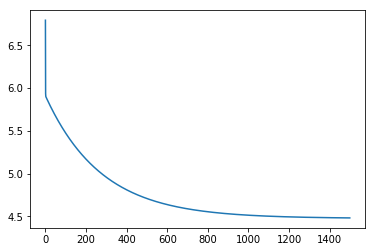

In [16]:
plt.plot(costs)

In [17]:
theta.shape

(2, 1)

In [18]:
predict1 = np.dot(np.array([1,3.5]),theta)
predict2 = np.dot(np.array([1,7]),theta)

In [19]:
print(predict1,predict2)

[0.44839858] [4.53286063]


In [20]:
theta

array([[-3.63606348],
       [ 1.16698916]])

In [21]:
XX = np.linspace(4,23)
YY = np.array([theta[0] + theta[1]*XX[i] for i in range(len(XX))])

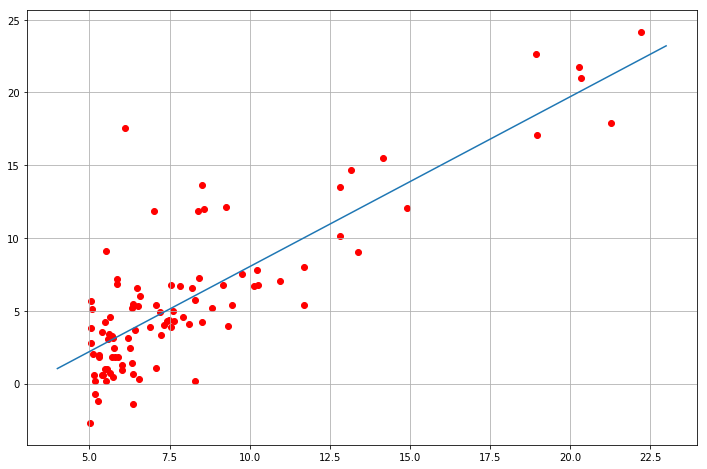

In [22]:
plt.figure(figsize=(12,8))
plt.plot(XX,YY)
plt.scatter(X[:,1],y, color = 'red')
plt.grid()

In [24]:
data = pd.read_csv('./ex1/ex1data2.txt', header=None)

In [25]:
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [26]:
X = data.iloc[:,[0,1]].values
y = data.iloc[:,-1].values.reshape(-1,1)

In [27]:
ones = np.ones(X.shape[0]).reshape(-1,1)

In [28]:
X = np.hstack((ones,X))

In [29]:
X.shape

(47, 3)

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

In [32]:
X[:,1:] = scaler.fit_transform(X[:,1:])

In [33]:
theta = np.zeros((3,1))

In [34]:
def compute_cost_multi(X,y,theta):
    return 1/(2*X.shape[0])*(np.dot((np.dot(X,theta) - y).T, (np.dot(X,theta) - y)))[0][0]

In [35]:
c1 = compute_cost_multi(X,y,theta)
print('Cost multi matrix {}'.format(c1))

Cost multi matrix 65591548106.45744


In [36]:
def compute_cost_multi_cycle(X,y,theta):
    cost = 0
    for i in range(X.shape[0]):
        cost+= np.square(np.dot(theta.T,X[i]) - y[i])
    cost = 1/(2*X.shape[0])*cost
    return cost[0]

In [37]:
c2 = compute_cost_multi_cycle(X,y,theta)
print('Cost multi cycle {}'.format(c2))

Cost multi cycle 65591548106.45744


In [38]:
def grad_descent(iterations, theta, X,y):
    costs = list()
    
    for j in range(iterations):
        theta[0] -= alpha*(1/X.shape[0])*np.sum((np.dot(theta.T,X.T) - y)*X[:,0])
        theta[1] -= alpha*(1/X.shape[0])*np.sum((np.dot(theta.T,X.T) - y)*X[:,1])
        theta[2] -= alpha*(1/X.shape[0])*np.sum((np.dot(theta.T,X.T) - y)*X[:,2])
        costs.append(compute_cost_multi_cycle(X,y,theta))
    return theta, costs

In [39]:
theta, costs = grad_descent(iterations,theta,X,y)
print(theta)

[[ 3.40412660e+05]
 [-8.49893772e-12]
 [ 1.06136097e-11]]


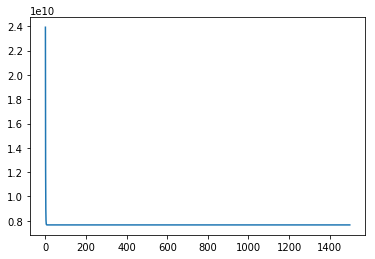

In [72]:
plt.plot(costs)

In [73]:
from scipy import linalg

In [82]:
theta = np.dot(np.dot(linalg.inv(np.dot(X.T,X)),X.T),y)

In [83]:
theta

array([[89597.9095428 ],
       [  139.21067402],
       [-8738.01911233]])

In [42]:
theta.shape

(3, 1)

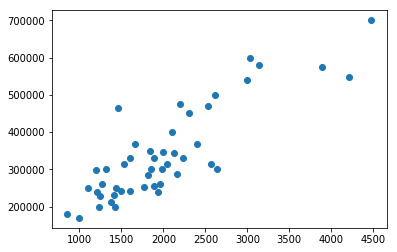

In [92]:
plt.scatter(X[:,1], y)

In [93]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

# Generate dummy data
x_train = np.random.random((100, 100, 100, 3))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)
x_test = np.random.random((20, 100, 100, 3))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(20, 1)), num_classes=10)

model = Sequential()
# input: 100x100 images with 3 channels -> (100, 100, 3) tensors.
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

model.fit(x_train, y_train, batch_size=32, epochs=10)
score = model.evaluate(x_test, y_test, batch_size=32)

/Users/tari/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/10
100/100 [==============================] - 8s 76ms/step - loss: 2.3686
Epoch 2/10
100/100 [==============================] - 6s 61ms/step - loss: 2.3621
Epoch 3/10
100/100 [==============================] - 6s 61ms/step - loss: 2.2886
Epoch 4/10
100/100 [==============================] - 6s 59ms/step - loss: 2.2908
Epoch 5/10
100/100 [==============================] - 6s 57ms/step - loss: 2.2879
Epoch 6/10
100/100 [==============================] - 5s 54ms/step - loss: 2.3050
Epoch 7/10
100/100 [==============================] - 5s 51ms/step - loss: 2.3086
Epoch 8/10
100/100 [==============================] - 5s 51ms/step - loss: 2.2834
Epoch 9/10
100/100 [==============================] - 5s 53ms/step - loss: 2.2852
Epoch 10/10
20/20 [==============================] - 1s 26ms/step
